In [4]:
%load_ext autoreload
%autoreload 2

In [182]:
from OSM import OSMB
import json
import os
import geopandas as gpd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
bounding_box = json.load(open('bounding_box.json'))

In [24]:
cities = dict(
    Ordu = dict(
        box= bounding_box["Ordu"]["box"],
    ),
    Manisa = dict(
        box= bounding_box["Manisa"]["box"],
    ),
    Adana = dict(
        box= bounding_box["Adana"]["box"],
    ),
    Trabzon = dict(
        box= bounding_box["Trabzon"]["box"],
    ),
    
    Cairo = dict(
        box= bounding_box["Cairo"]["box"],
    ),
    Johannesburg = dict(
        box= bounding_box["Johannesburg"]["box"],
    ),
)

In [40]:
# todo: make sure the crs is EPSG:4326

for index, (key, val) in enumerate(cities.items()):
    box = val["box"],
    temp = OSMB(box[0])
    temp.get_data()
    path = os.path.join("data","OSMB",f"{key}.pkl")
    temp.gdf.to_pickle(path)

100%|██████████| 6882/6882 [45:26<00:00,  2.52it/s]  


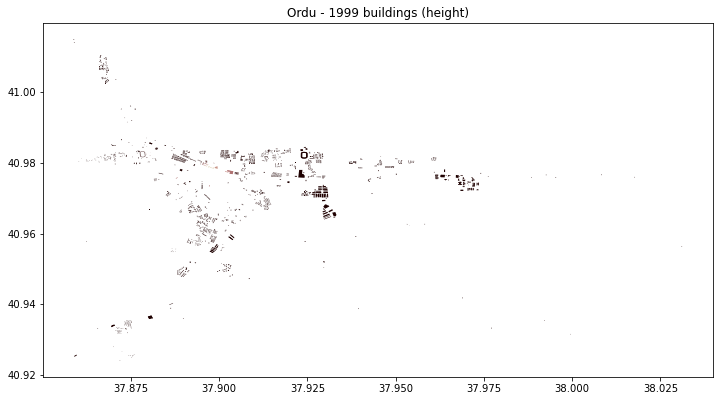

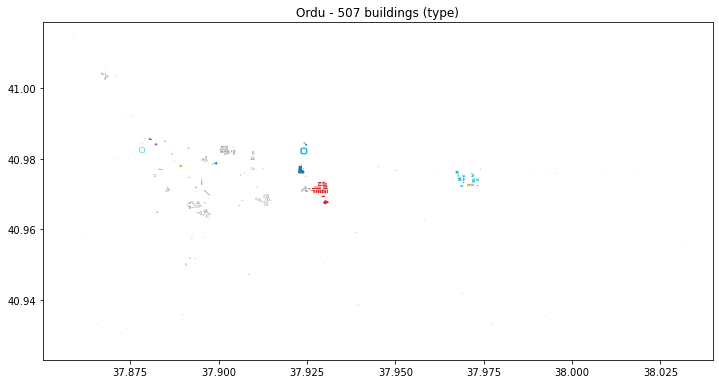

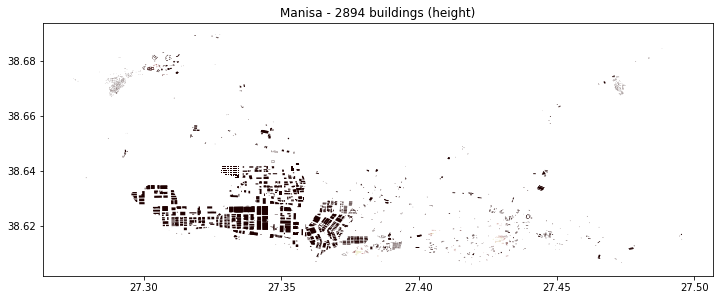

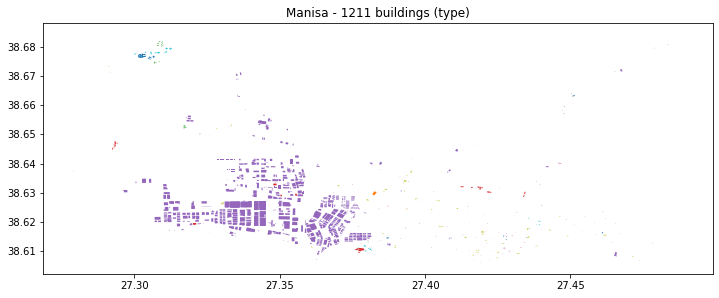

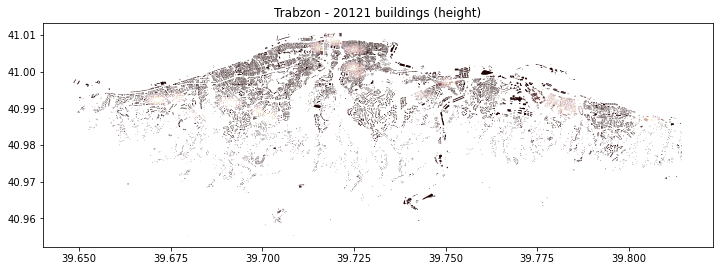

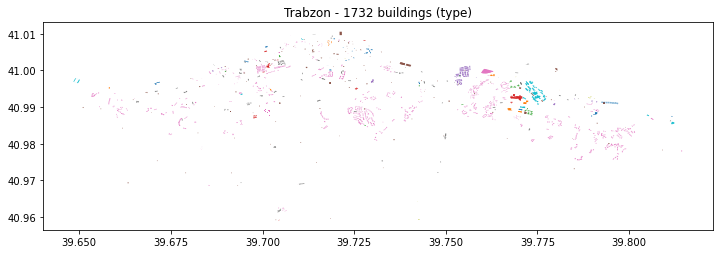

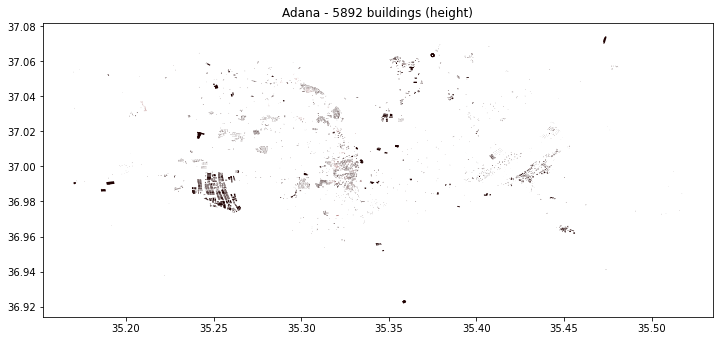

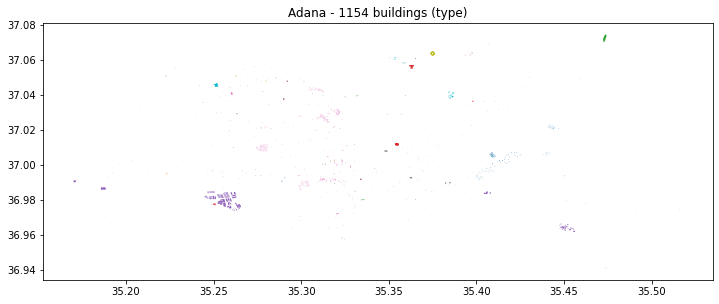

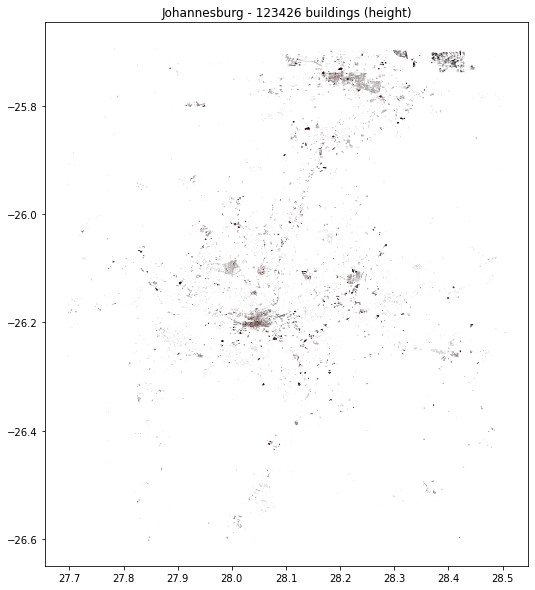

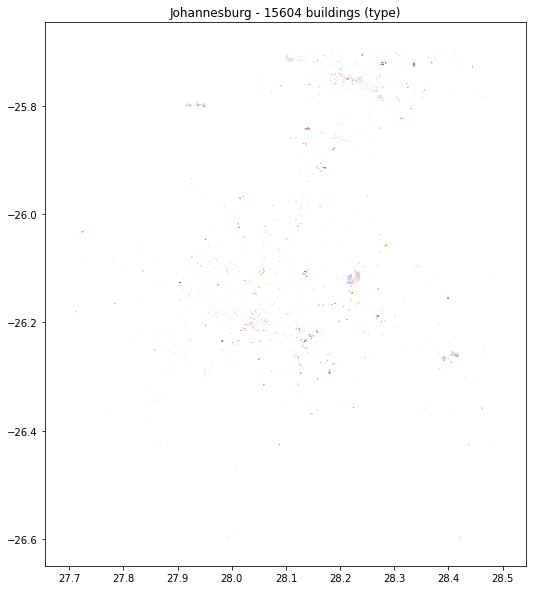

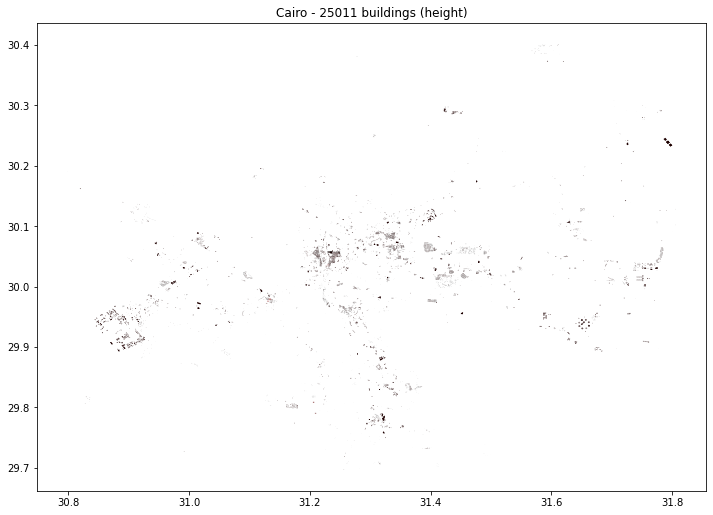

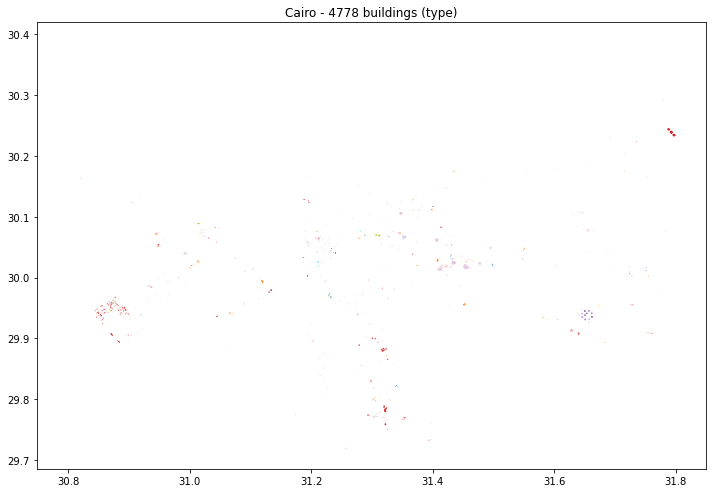

In [15]:
cities = ["Ordu",
          "Manisa",
          "Trabzon",
          "Adana",
          "Johannesburg",
          "Cairo",
          ]
for c in cities:
    path = os.path.join("data","OSMB",f"{c}.pkl")
    with open(path, 'rb') as f:
        data = pickle.load(f)
    data.plot(column="height", cmap="pink", figsize=(12,10))
    plt.title(f"{c} - {data.shape[0]} buildings (height)")
    data[~data["type"].isna()].plot(column="type", figsize=(12,10))
    plt.title(f"{c} - {data[~data['type'].isna()].shape[0]} buildings (type)")

In [224]:
cities = ["Ordu",
          "Manisa",
          "Trabzon",
          "Adana",
          "Johannesburg",
          "Cairo",
          ]
res = []
for c in cities:
    path = os.path.join("data","OSMB",f"{c}.pkl")
    with open(path, 'rb') as f:
        data = pickle.load(f)
    res.extend(data["type"].unique())
print(set(res))

{nan, nan, nan, nan, nan, 'toilets', nan, 'skyscraper', 'dmg', 'city_hall', 'houseboat', 'sphinx', 'boom', 'university', 'felder', 'dormitory', 'bridge', 'civic', 'dental_office', 'mall', 'prison', 'sty', 'kindergarten', 'administration', 'control', 'shelter', 'trumpf', 'department_store', 'religious', 'stable', 'bakery', 'bungalow', 'college', 'industrial', 'motel', 'service', 'grandstand', 'silo', 'apartment', 'beauty_salon', 'bunker', 'cultural', 'storage', 'educational', 'manufacture', 'cathedral', 'parking', 'library', 'hospital', 'dam', 'supermarket', 'cooling_tower', 'commercial', 'fashion_store', 'retail', 'stands', 'historical', 'pyramid', 'transportation', 'pavilion', 'construction', 'ruins', 'chapel', 'tower', 'law_office', 'semidetached_house', 'carport', 'flats', 'greenhouse', 'government_puplic_service_centre', 'factory', 'mortuary_temple', 'pyramide', 'residential', 'stadium', 'school', 'townhall', 'station', 'synagogue', 'roof', 'civil_service', 'storage_tank', 'wayside

---

In [215]:
from OSM import OSM

In [ ]:
for index, (key, val) in enumerate(cities.items()):
    print(key)
    box = val["box"]
    temp = OSM(box)
    temp.get_builidngs()
    path = os.path.join("data","OSM",f"{key}.pkl")
    temp.gdf.to_pickle(path)

In [ ]:
for index, (key, val) in enumerate(cities.items()):
    print(key)
    box = val["box"]
    temp = OSM(box)
    temp.get_builidngs()
    path = os.path.join("data","OSM",f"{key}.pkl")
    temp.gdf.to_pickle(path)

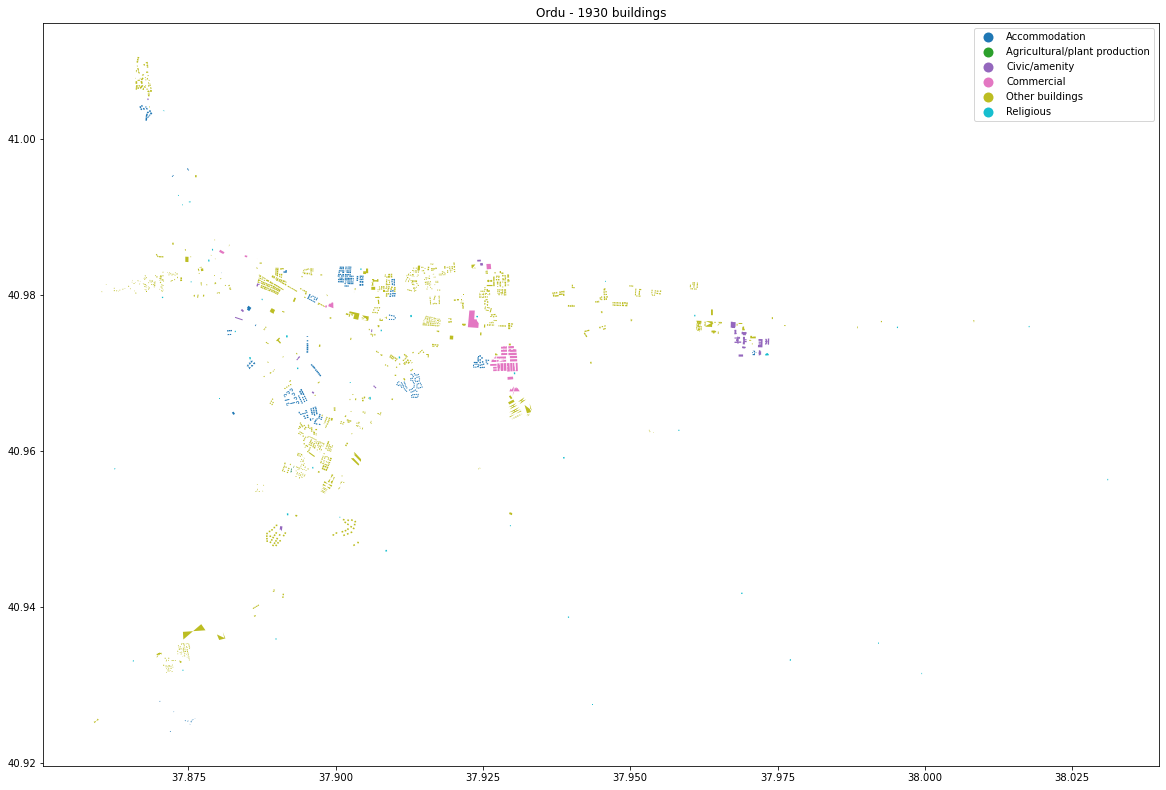

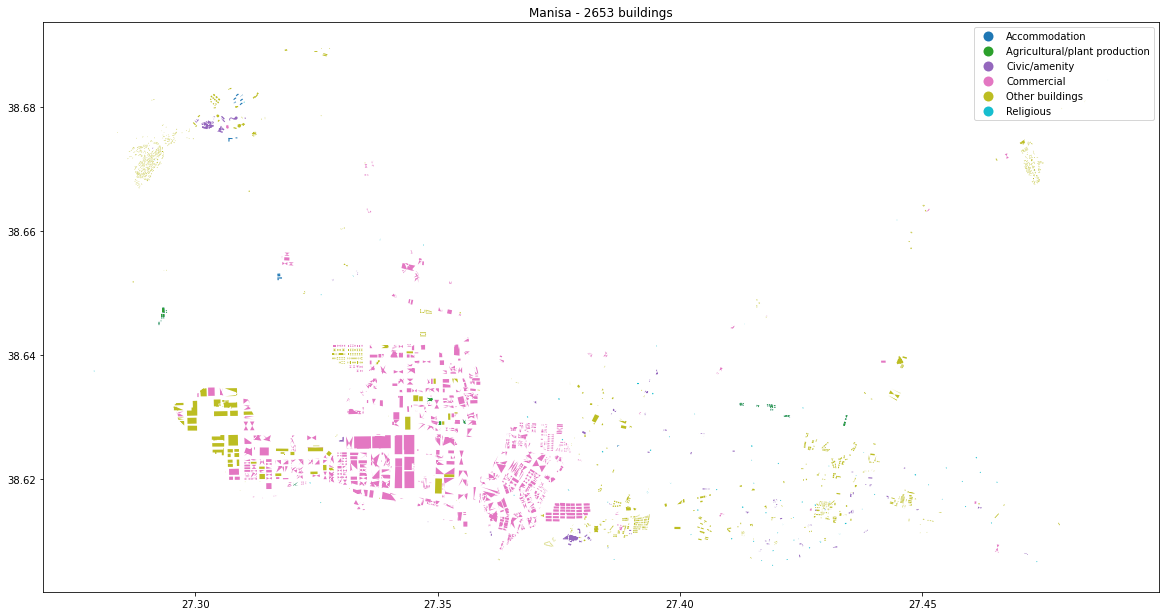

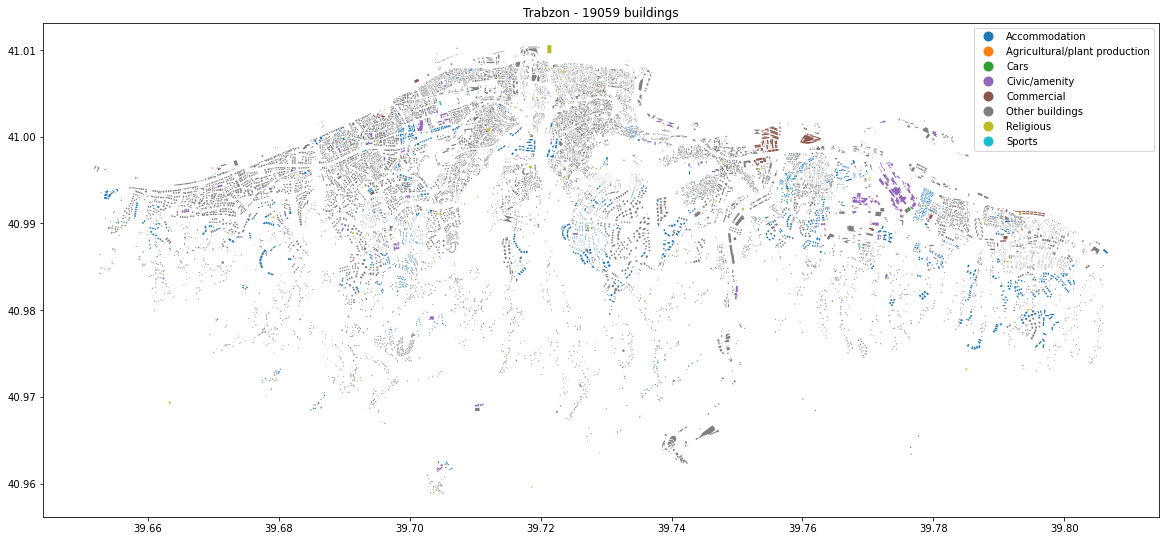

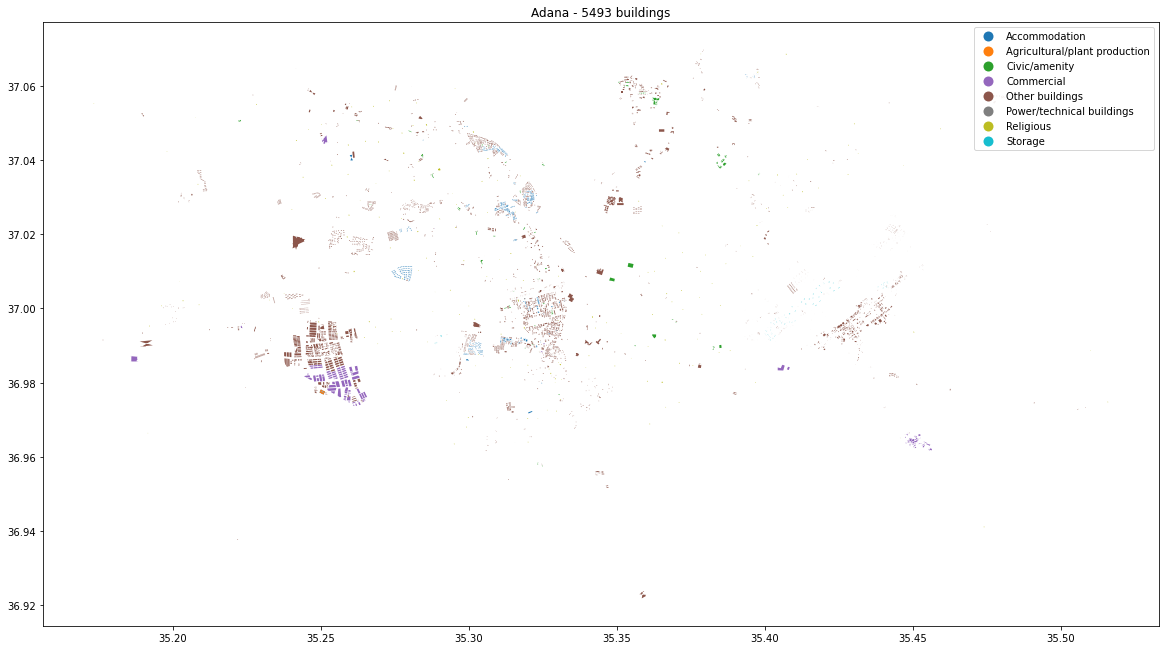

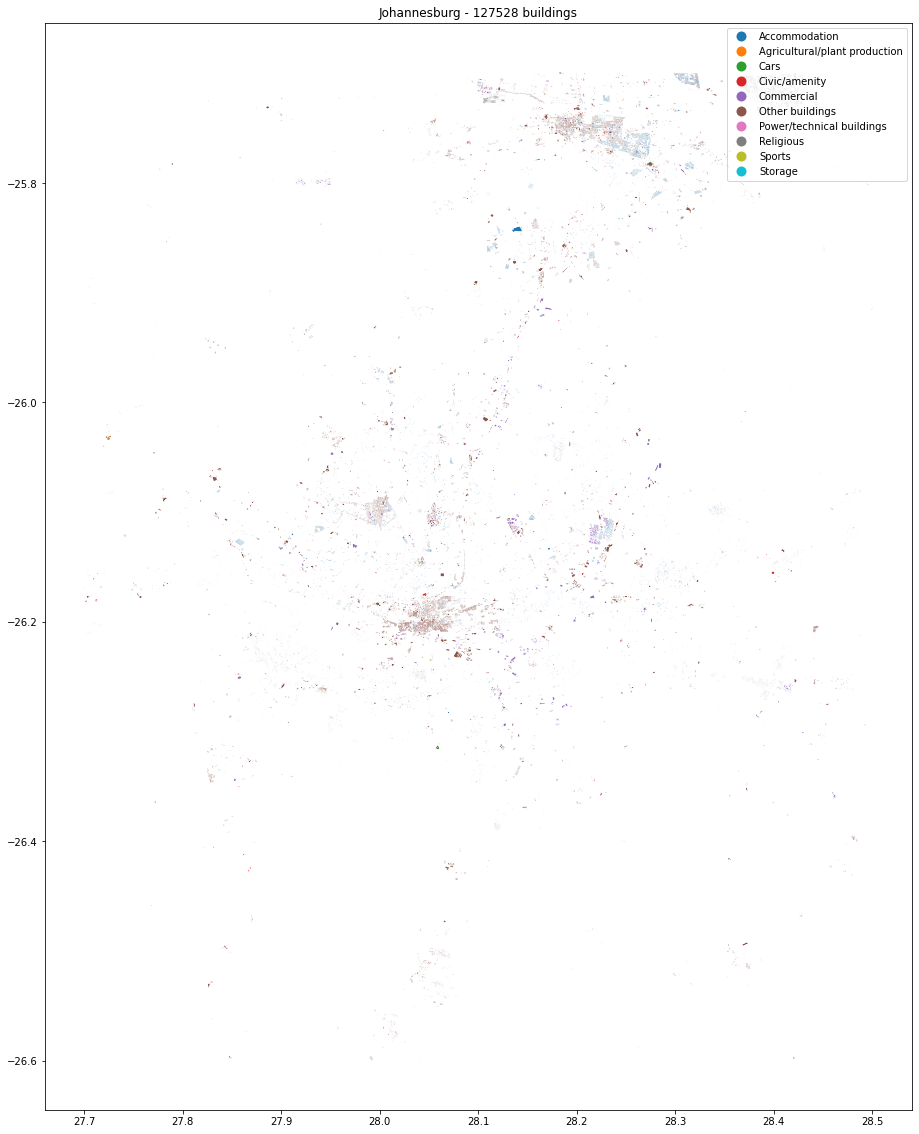

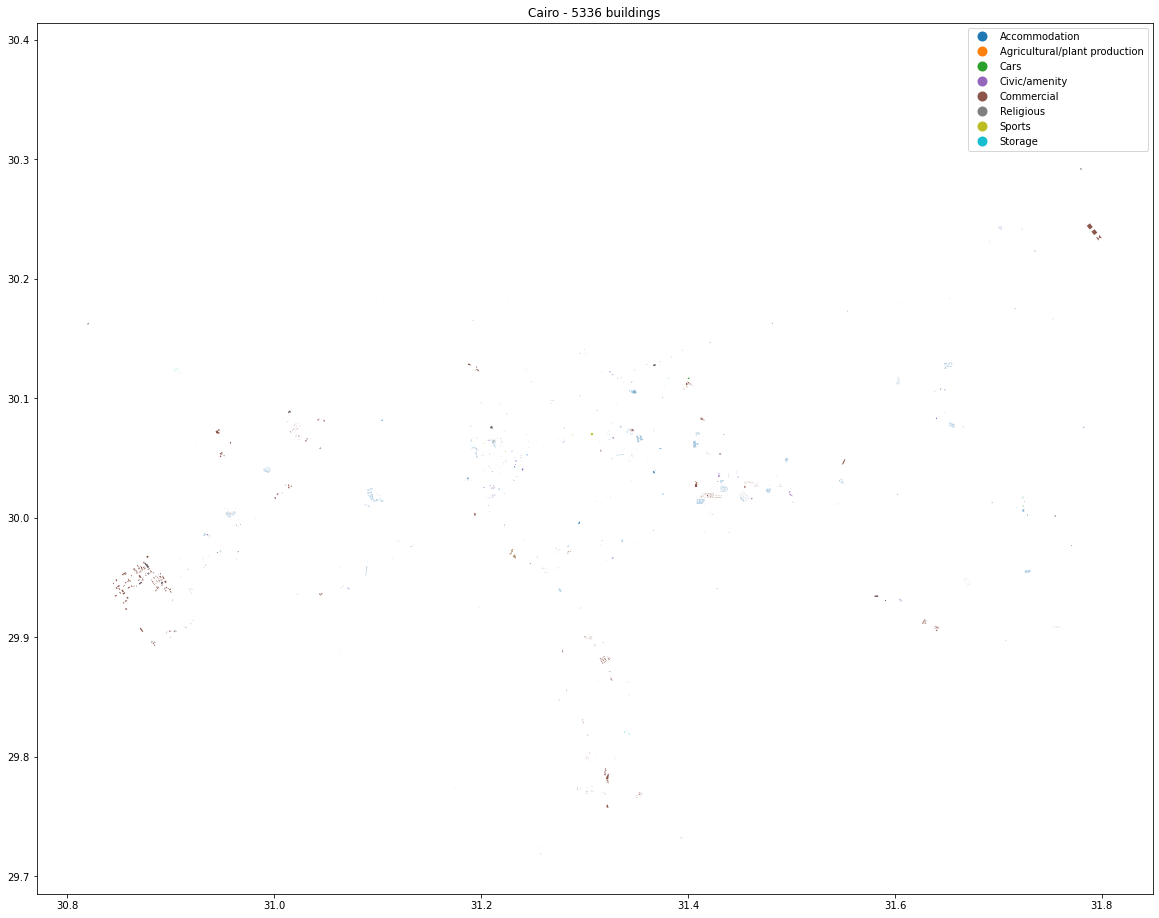

In [222]:
from matplotlib import colorbar

cities = ["Ordu",
          "Manisa",
          "Trabzon",
          "Adana",
          "Johannesburg",
          "Cairo",
          ]
for c in cities:
    path = os.path.join("data","OSM",f"{c}.pkl")
    with open(path, 'rb') as f:
        geo_df = pickle.load(f)
    geo_df = geo_df[geo_df["type"]=="way"]
    geo_df.plot(column="category", figsize=(20,20), legend=True)
    plt.title(f"{c} - {geo_df.shape[0]} buildings")